In [1]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering

In [2]:
# initialize the data set we'll work with
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

In [3]:
# define the model
agglomerative_model = AgglomerativeClustering(n_clusters=2)

In [4]:
# assign each data point to a cluster
agglomerative_result = agglomerative_model.fit_predict(training_data)

In [5]:
# get all of the unique clusters
agglomerative_clusters = unique(agglomerative_result)

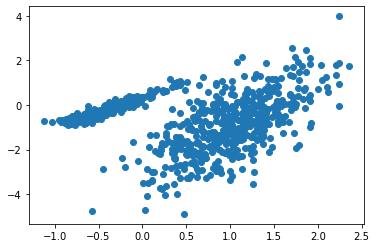

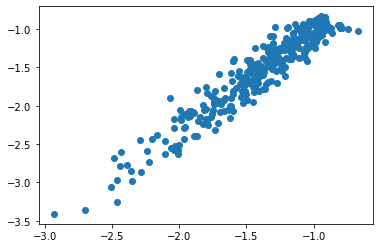

In [10]:
# plot the clusters
for agglomerative_cluster in agglomerative_clusters:
    # get data points that fall in this cluster
    index = where(agglomerative_result == agglomerative_cluster)
    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1])
    # show the Agglomerative Hierarchy plot
    pyplot.show()

In [11]:
#Another method
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [13]:
# Generate sample data with blobs
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=0.6, random_state=0)

In [14]:
# DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5)
y_db = db.fit_predict(X)

In [15]:
# Number of clusters in labels, ignoring noise if present (-1)
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)

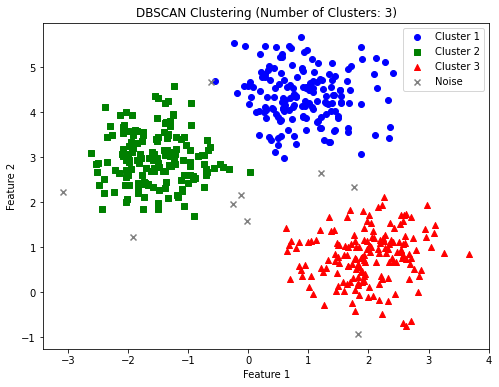

In [16]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[y_db == 0][:, 0], X[y_db == 0][:, 1], c='blue', marker='o', label='Cluster 1')
plt.scatter(X[y_db == 1][:, 0], X[y_db == 1][:, 1], c='green', marker='s', label='Cluster 2')
plt.scatter(X[y_db == 2][:, 0], X[y_db == 2][:, 1], c='red', marker='^', label='Cluster 3')
plt.scatter(X[y_db == -1][:, 0], X[y_db == -1][:, 1], c='gray', marker='x', label='Noise')
plt.legend(loc='best')
plt.title(f"DBSCAN Clustering (Number of Clusters: {n_clusters_})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()